In [3]:
import pandas as pd
trp2=pd.read_csv("trainProject2.txt",names=["b1","b2"])
tep2=pd.read_csv("testProject2.txt",names=["b1","b2"])

In [4]:
#question a
# implement a linear regression learner to solve this best fit problem for 1 dimensional data. Make sure your
# implementation can handle fits for different ”function depths” (at least to ”depth” 3) using scikit-learn and other librarie

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



b=trp2['b1'].values
s=trp2['b2'].values
c=tep2['b1'].values
z=tep2['b2'].values

k=0.5
de= [0, 1, 2, 3]
err=[]


def depth_functions(x, k, d):
    lrf=[]
    lrf.append(np.ones_like(x))
    for i in range(0, d+1):
        lrf.append(1+np.sin(i * k * x))
    return np.array(lrf).T
       
        
for d in de:
    c1= depth_functions(b, k, d)
    model = LinearRegression()
    model.fit(c1, s)
    c2= depth_functions(c, k, d)
    y_pred = model.predict(c2)
    err.append(np.mean((c - y_pred) ** 2))
    

for d in de:
    print(f"error on the test data points at depth{d}:",err[d])


error on the test data points at depth0: 4.18667989146155
error on the test data points at depth1: 1.8778994404788922
error on the test data points at depth2: 13.63699168183039
error on the test data points at depth3: 14.138261437847039


plot of function for depth0:


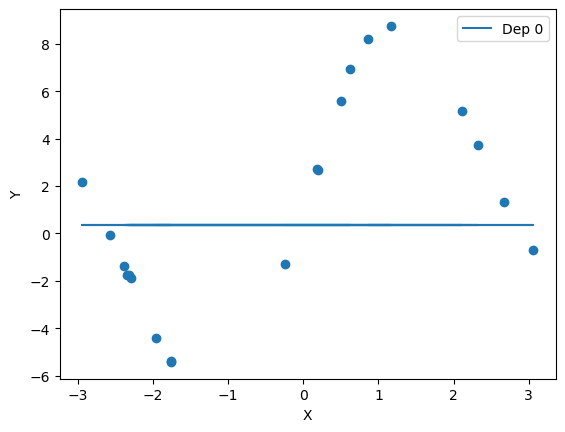

plot of function for depth1:


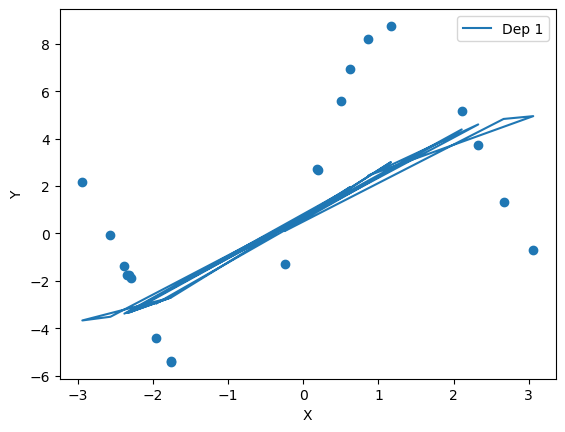

plot of function for depth2:


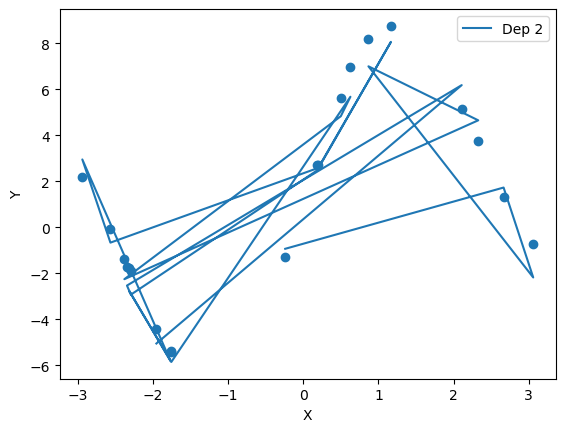

plot of function for depth3:


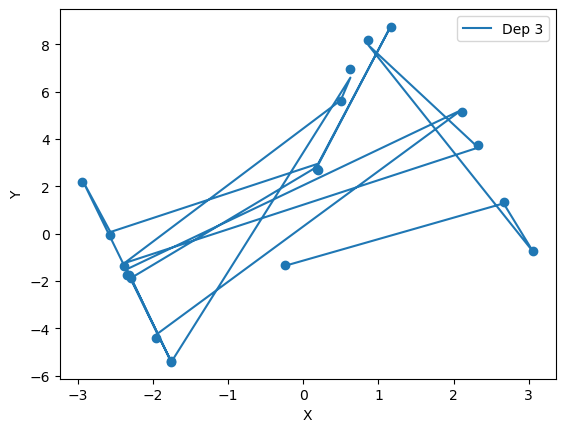

error on the test data points at depth0: 4.18667989146155
error on the test data points at depth1: 1.877899440478884
error on the test data points at depth2: 13.636991681830386
error on the test data points at depth3: 14.138261437847026

plot of depth and errors:


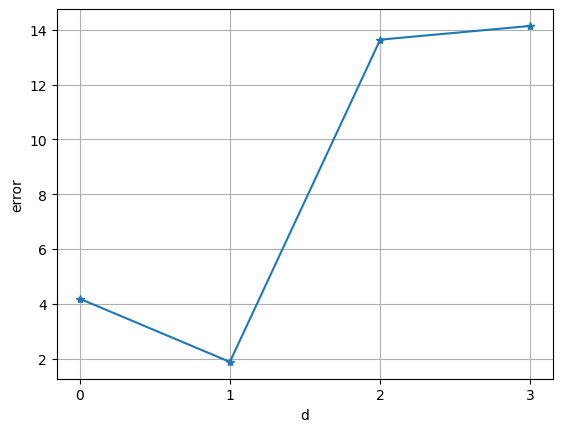

best depth=1 as it has minimum error


In [5]:
#question b
# Implement a linear regression learner to solve this best fit problem for 1 dimensional data. Make sure your
# implementation can handle fits for different” function depths” (at least to ”depth” 3) in Python using only
# NumPy, math, matplotlib libraries. Essentially implement Linear Regression from scratch

import numpy as np
import math
import matplotlib.pyplot as plt


b=trp2['b1'].values
s=trp2['b2'].values
c=tep2['b1'].values
z=tep2['b2'].values

k=0.5
de= [0, 1, 2, 3]
err=[]   


def depth_functions(x, k, d):
    lrf=[]
    lrf.append(np.ones_like(x))
    for i in range(0, d+1):
        lrf.append(1+np.sin(i * k * x))
    return np.array(lrf).T

        
for d in de:
    c3= depth_functions(b, k, d)
    piv = np.linalg.pinv(c3)  #used linalg.pinv function in numpy for fitting
    hj = np.dot(piv, s)
    c4= depth_functions(c, k, d)
    y_pred =np.dot(c4, hj)       
    
# question c
# plot the resulting function for “function depth” 0, 1, 2, and 3. 
    print(f"plot of function for depth{d}:")
    plt.scatter(c,z) 
    plt.plot(c, y_pred, label=f'Dep {d}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    
#question d
#Evaluate your regression functions by computing the error on the test data points that were generated Which ”function depth” would you consider the best prediction function and why? With which
#values of d do you get minimum error? Results must include a plot
   
    err.append(np.mean((c - y_pred) ** 2))
    

for d in de:
    print(f"error on the test data points at depth{d}:",err[d])

print("\nplot of depth and errors:")
plt.plot(de, err,marker="*")
plt.xlabel('d')
plt.ylabel('error')
plt.xticks(de)
plt.grid(True)
plt.show()

print(f"best depth={de[np.argmin(err)]} as it has minimum error")

# question 4 continuation
by the output above the depth 1 is the best depth function as it has minimum error when compared to other depth functions
which is  1.877899440478884. so the best prediction function is 1, sin(0.5*x).
you can find the plot and error values in the above output by scrolling output section.